# **Furniture Sale Data Analysis**
### Project By: Shaikh Amina
### Trainer: Rajshri Thete

## **Introduction**
The furniture industry is competitive, with factors like price, material, and seasonal demand affecting sales. This project analyzes furniture sales data to uncover trends, such as identifying popular categories, seasonal effects, and store performance. Insights will drive data-based decisions that improve sales strategies, customer satisfaction, and operational efficiency.

## **Problem Statement**
The furniture industry faces challenges in optimizing inventory management, understanding seasonal sales fluctuations, and determining the impact of discounts and store types on profitability. Businesses often struggle to make data-driven decisions that balance stock levels, seasonal demand, and pricing strategies. This project aims to address these challenges by analyzing sales data to provide actionable insights that enhance operational efficiency, inventory control, and sales performance across different product categories, seasons, and store types.

## **Objectives**
The primary objectives of this project are:

1. Analyze the impact of various product categories, materials, and colors on sales performance.
2. Identify which season sees the highest sales and which categories are in demand during different seasons.
3. Investigate the effect of discounts on sales volume and revenue.
4. Determine which store type (e.g., online vs. retail) has higher sales and profitability.
5. Analyze inventory levels to identify potential overstock or understock situations.
6. Calculate the average delivery time and its impact on customer satisfaction.
7. Identify the relationship between sales volume by Store Type and Location.

### Import Libraries

In [3]:
import mysql.connector #connecting and interacting with a MySQL database
import pandas as pd #data manipulation 
import numpy as np #numerical computing
import matplotlib.pyplot as plt # interactive visualizations 
import seaborn as sns #statistical visualization based matplotlib

**Insights:** 
Imports the following libraries for data processing, database interaction, and visualization.

In [4]:
connection = mysql.connector.connect(
user='root',
password='security',
host='localhost',
database='furniture' 
)

**Insights:** 
connection to a MySQL database named 'furniture'

In [5]:
cursor = connection.cursor() #create a cursor object that allows you to interact with the database.

In [6]:
query= """
SELECT p.Category, p.Material, p.Color, p.Price, p.Inventory, s.Sales, s.Discount_Percentage, s.Delivery_Days, s.Location, s.Season, s.Store_type, s.Revenue, s.Profit_Margin
FROM Product_Info p
JOIN Sales_Info s ON p.Product_ID = s.Product_ID;
"""

# Execute the SQL query
cursor.execute(query) 

**Insights:** 
SQL query to retrieve data by joining two tables: Product_Info and Sales_Info, based on a common field, Product_ID.

### Loading dataset

In [7]:
df= pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description]) 
# fetches all the rows returned by the SQL query executed earlier


In [8]:
df.head()

,Category,Material,Color,Price,Inventory,Sales,Discount_Percentage,Delivery_Days,Location,Season,Store_type,Revenue,Profit_Margin
0,Bed,Plastic,Red,219,105,40,28,9,Rural,Spring,Online,3949,17
1,Chair,Glass,Blue,478,192,7,27,6,Rural,Summer,Online,-3521,19
2,Table,Metal,Black,378,59,32,22,2,Suburban,Fall,Online,14286,27
3,Table,Glass,Green,319,45,48,11,2,Rural,Summer,Retail,12261,12
4,Chair,Glass,Brown,120,35,19,3,9,Rural,Fall,Online,-4588,42


**Insights:** 
The first five rows of a dataset.

In [9]:
df.shape

(100, 13)

## **Data CLeaning**

### Missing Value

In [10]:
# to identify the number of missing (null) values in each column of a DataFrame
df.isnull().sum()

Category               0
Material               0
Color                  0
Price                  0
Inventory              0
Sales                  0
Discount_Percentage    0
Delivery_Days          0
Location               0
Season                 0
Store_type             0
Revenue                0
Profit_Margin          0
dtype: int64

**Insights:** 
There is no any null values present in data.

### Duplicate values

In [11]:
df[df.duplicated()]

,Category,Material,Color,Price,Inventory,Sales,Discount_Percentage,Delivery_Days,Location,Season,Store_type,Revenue,Profit_Margin


**Insights:** 
There is no duplicate value

In [12]:
df.dtypes

Category               object
Material               object
Color                  object
Price                   int64
Inventory               int64
Sales                   int64
Discount_Percentage     int64
Delivery_Days           int64
Location               object
Season                 object
Store_type             object
Revenue                 int64
Profit_Margin           int64
dtype: object

In [13]:
df['Category'].unique()

array(['Bed', 'Chair', 'Table', 'Sofa', 'Desk'], dtype=object)

In [14]:
df['Material'].unique()

array(['Plastic', 'Glass', 'Metal', 'Wood', 'Fabric'], dtype=object)

In [15]:
df['Color'].unique()

array(['Red', 'Blue', 'Black', 'Green', 'Brown', 'White'], dtype=object)

In [16]:
df['Delivery_Days'].unique()

array([9, 6, 2, 8, 4, 1, 7, 5, 3])

In [17]:
df['Location'].unique()

array(['Rural', 'Suburban', 'Urban'], dtype=object)

In [18]:
df['Season'].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [19]:
df['Store_type'].unique()

array(['Online', 'Retail'], dtype=object)

In [20]:
df.describe() #calculates the descriptive statistics.


,Price,Inventory,Sales,Discount_Percentage,Delivery_Days,Revenue,Profit_Margin
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,261.270000,93.900000,22.440000,14.670000,4.780000,5320.360000,30.850000
std,135.306599,58.443878,13.681308,8.780206,2.665075,5870.774424,11.774287
min,52.000000,0.000000,1.000000,0.000000,1.000000,-10139.000000,10.000000
25%,133.000000,42.000000,10.000000,7.000000,2.000000,1217.000000,20.000000
50%,267.000000,87.000000,21.000000,14.000000,5.000000,5264.000000,32.500000
75%,378.000000,142.750000,34.250000,22.000000,7.000000,9377.750000,41.000000
max,494.000000,198.000000,48.000000,30.000000,9.000000,17544.000000,50.000000


**Insights:** 
This descriptive summary gives a clear overview of the spread and central tendencies in the data.

In [21]:
# Grouping the DataFrame by 'Inventory' and 'Sales' columns
df.groupby(['Inventory','Sales'])['Revenue'].sum().sort_values(ascending=False)[1:11]

Inventory  Sales
54         9        16752
79         38       16566
83         42       15885
193        25       15434
62         35       15333
59         32       14286
46         46       13865
187        7        13170
29         24       12836
153        34       12646
Name: Revenue, dtype: int64

**Insights:** 
Inventory levels around 50 to 80 combined with varying sales figures tend to generate the highest revenues, indicating optimal inventory and sales strategies.

In [22]:
# Total_price for each category and material
df.groupby(['Category', 'Material']).agg(total_price=('Price', 'sum')).reset_index()


,Category,Material,total_price
0,Bed,Fabric,1497
1,Bed,Glass,1409
2,Bed,Metal,598
3,Bed,Plastic,1573
4,Bed,Wood,1673
5,Chair,Fabric,742
6,Chair,Glass,1541
7,Chair,Metal,777
8,Chair,Plastic,1478
9,Chair,Wood,1344


**Insights:** 
* Sofas made from wood are the most expensive combination, while other materials like fabric and plastic are less expensive for similar categories.
* Plastic materials tend to have lower total prices for items like Table and Sofa, making them more affordable options across multiple categories.

## **Data Visualization**

### 1. Analyze the impact of various product categories, materials, and colors on sales performance.

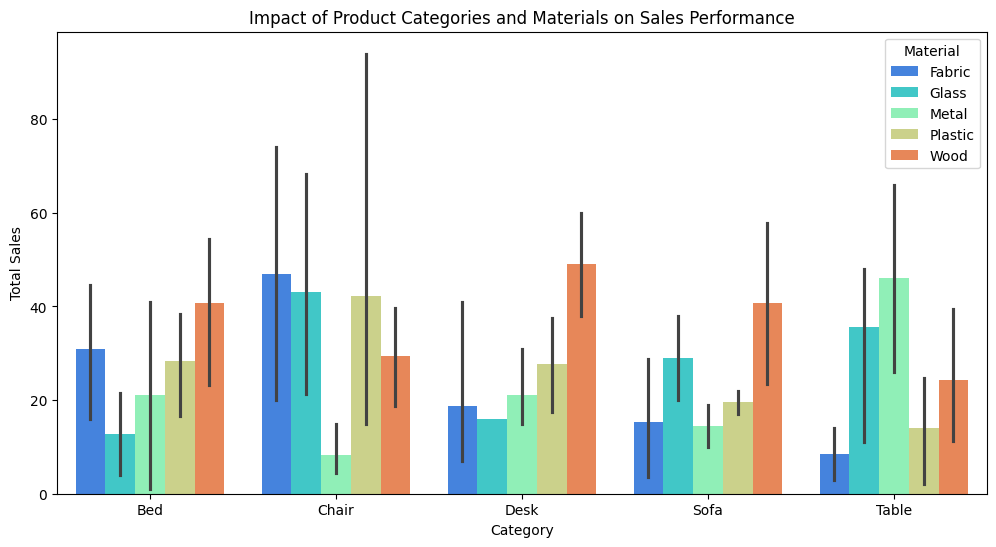

In [23]:
# Aggregating sales by Category, Material, and Color
sales_performance = df.groupby(['Category', 'Material', 'Color']).agg(total_sales=('Sales', 'sum')).reset_index()

# Bar plot to visualize the impact of product categories, materials, and colors on sales performance
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='total_sales', hue='Material', data=sales_performance, palette='rainbow')

# Adding title and labels
plt.title('Impact of Product Categories and Materials on Sales Performance')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.show()

**Insights:** 
* Each product category (Bed, Chair, Desk, Sofa, Table) has multiple material options, and the heights of the bars show how well each material performed in terms of sales.
* The error bars (vertical lines on top of bars) suggest there is variability in the sales data for each material, with some having higher uncertainty.
* Wood and Metal generally seem to perform well across most categories (especially Desk, Sofa, and Table), while Fabric and Plastic have mixed results depending on the product category.

### 2. Identify which season sees the highest sales and which categories are in demand during different seasons.

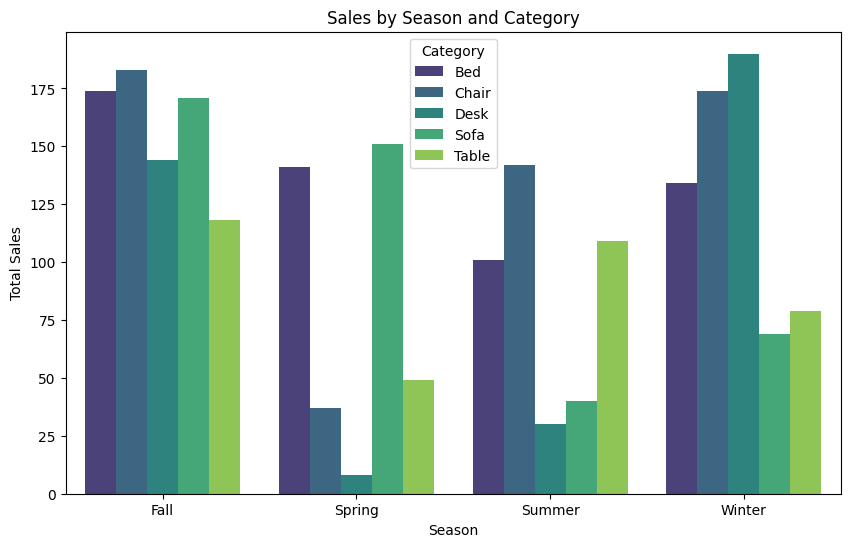

In [24]:
# Aggregating sales by Season and Category
seasonal_sales = df.groupby(['Season', 'Category']).agg(total_sales=('Sales', 'sum')).reset_index()

# Bar plot to visualize sales by season and category
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='total_sales', hue='Category', data=seasonal_sales, palette='viridis')
plt.title('Sales by Season and Category')
plt.ylabel('Total Sales')
plt.show()

**Insights:** 
* Winter and Fall seem to have higher sales across multiple categories compared to Spring and Summer.
* Chairs and Sofas seem to perform consistently well across seasons, especially in Winter.
* Tables have the lowest sales in all seasons except Summer.

### 3. Investigate the effect of discounts on sales volume.

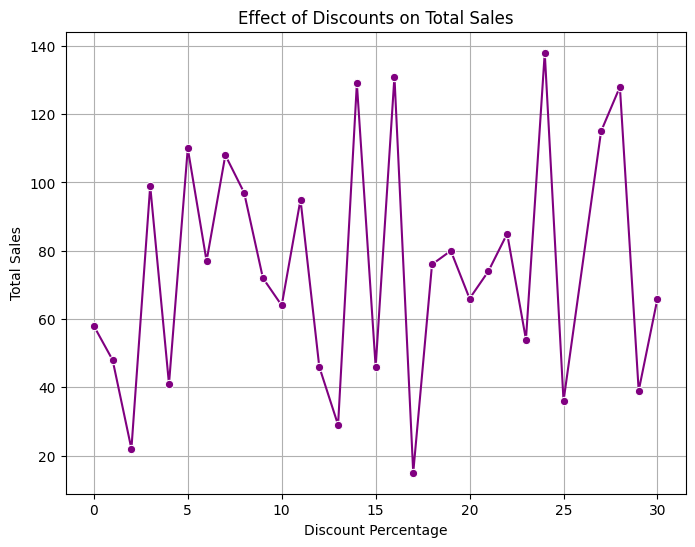

In [25]:
# Aggregating the data by Discount_Percentage to get total sales
discount_sales = df.groupby('Discount_Percentage').agg(total_sales=('Sales', 'sum')).reset_index()

# Line plot to visualize the relationship between discount percentage and total sales
plt.figure(figsize=(8, 6))
sns.lineplot(x='Discount_Percentage', y='total_sales', data=discount_sales, marker='o', color='purple')

# Adding title and labels
plt.title('Effect of Discounts on Total Sales')
plt.xlabel('Discount Percentage')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

**Insights:** 
* Sales fluctuate significantly with varying discount percentages, showing no consistent trend of higher sales as discounts increase.
* Peak sales occur at both lower (5-10%) and higher (25-30%) discount levels

### 4. Determine which store type (e.g., online vs. retail) has higher sales and profitability.

C:\Users\shaik\AppData\Local\Temp\ipykernel_12580\2875038974.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store_type', y='total_sales', data=store_sales, ax=ax[0], palette='Set1')
C:\Users\shaik\AppData\Local\Temp\ipykernel_12580\2875038974.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store_type', y='total_profit', data=store_sales, ax=ax[1], palette='Set2')


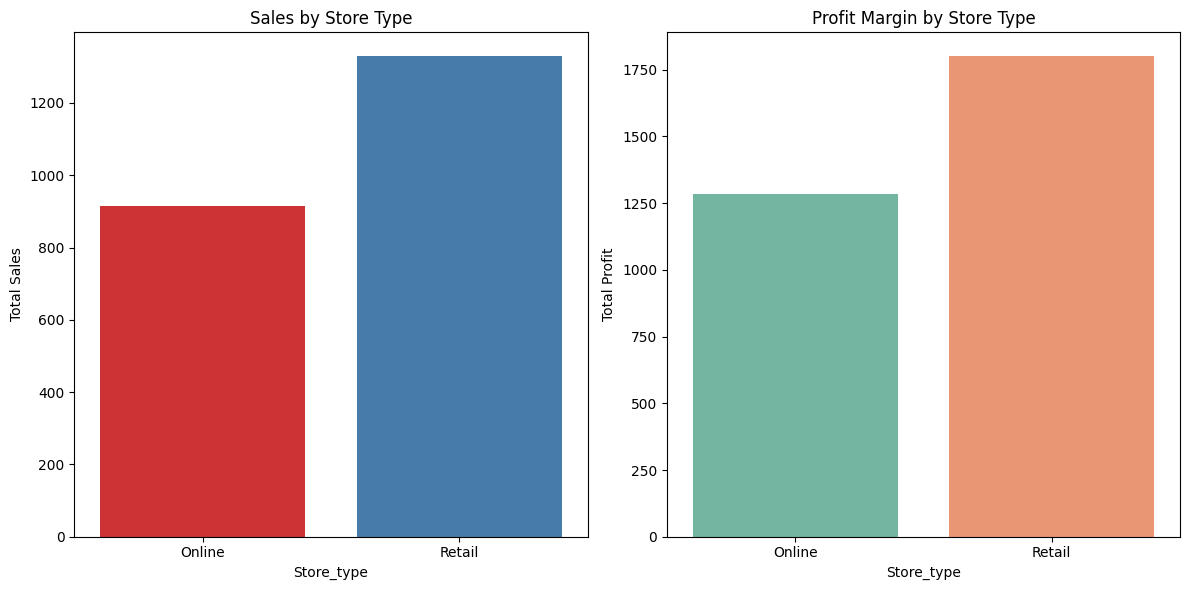

In [26]:
# Aggregating sales and profitability by store type
store_sales = df.groupby('Store_type').agg(total_sales=('Sales', 'sum'), total_profit=('Profit_Margin', 'sum')).reset_index()

# Bar plot to compare store types in terms of sales and profitability
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x='Store_type', y='total_sales', data=store_sales, ax=ax[0], palette='Set1')
ax[0].set_title('Sales by Store Type')
ax[0].set_ylabel('Total Sales')

sns.barplot(x='Store_type', y='total_profit', data=store_sales, ax=ax[1], palette='Set2')
ax[1].set_title('Profit Margin by Store Type')
ax[1].set_ylabel('Total Profit')

plt.tight_layout()
plt.show()

**Insights:** 
* Retail Stores Outperform Online Stores in Both Sales and Profit
* Online Stores Generate Lower Sales and Profit
* Profitability is Strong in Retail

### 5. Analyze inventory levels to identify potential overstock or understock situations.

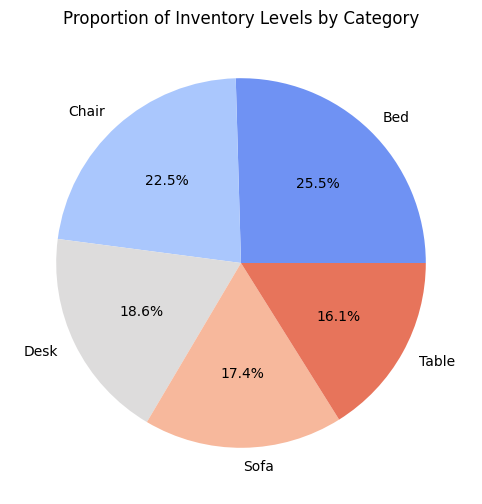

In [27]:
# Pie chart to show the proportion of inventory levels across categories
inventory_by_category = df.groupby('Category')['Inventory'].sum()

plt.figure(figsize=(8, 6))
plt.pie(inventory_by_category, labels=inventory_by_category.index, autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(inventory_by_category)))
plt.title('Proportion of Inventory Levels by Category')
plt.show()

**Insights:** 

* Bed and Chair categories hold the largest inventory shares, comprising nearly half of the total inventory (48%), suggesting these are likely high-demand or core products.
* Sofa and Table categories have relatively smaller shares, indicating these may either have lower demand or require less stock compared to Beds and Chairs.

### 6. Calculate the average delivery time and its impact on customer satisfaction.

Average Delivery Time: 4.78 days


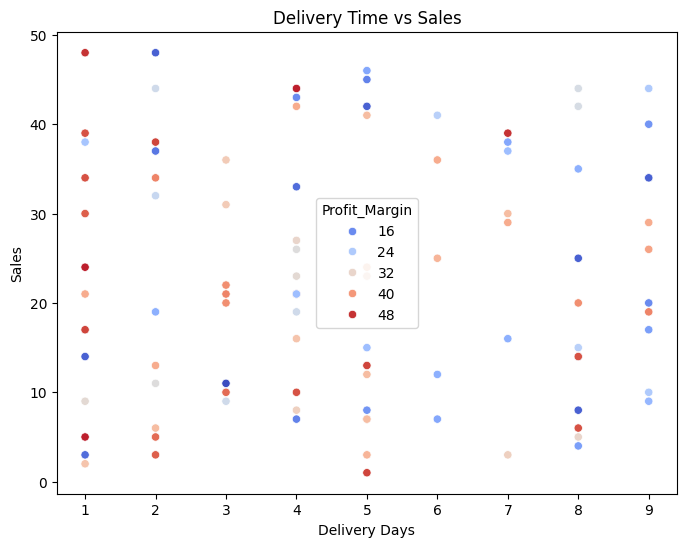

In [28]:
# Calculate average delivery time
avg_delivery_time = df['Delivery_Days'].mean()
print(f"Average Delivery Time: {avg_delivery_time} days")

# Scatter plot to investigate the relationship between delivery time and sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Delivery_Days', y='Sales', data=df, hue='Profit_Margin', palette='coolwarm')
plt.title('Delivery Time vs Sales')
plt.xlabel('Delivery Days')
plt.ylabel('Sales')
plt.show()

**Insights:** 

* There is no clear correlation between delivery time and sales volume, as sales are spread across different delivery durations.
* Higher profit margins (in red) appear at both shorter and longer delivery times, suggesting that delivery time does not significantly impact profitability.

### 7. Identify the relationship between sales volume by Store Type and Location.

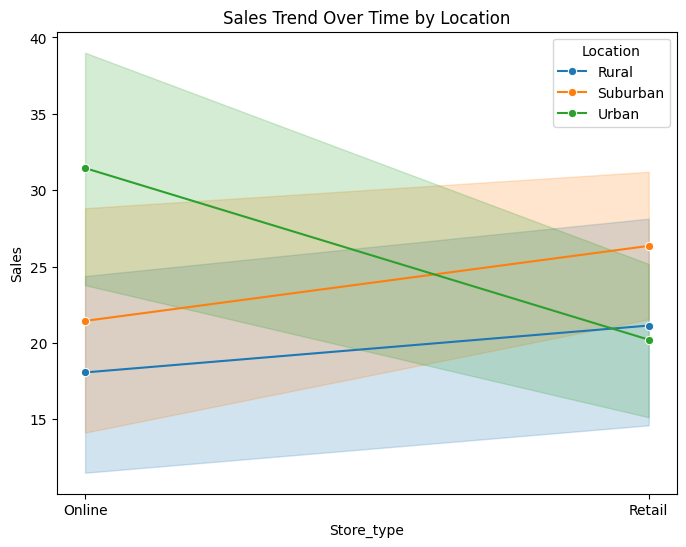

In [35]:
# Line plot showing Sales over time per Location (Assuming you have a 'Delivery_Days' column in the format)
plt.figure(figsize=(8, 6))

sns.lineplot(x='Store_type', y='Sales', hue='Location', data=df, marker='o')
plt.title('Sales Trend Over Time by Location')
plt.show()


**Insights:** 
* Urban locations (green line) show a decreasing trend in sales when moving from Online to Retail store types.
* Suburban locations (orange line) show a increase significantly from online to retail, indicating a strong preference for in-store shopping.
* Rural locations (blue line) show a rise slightly from online to retail, showing continued importance of physical stores.

## **Conclusion**
**Seasonal Sales:** Winter and Fall outperform Spring and Summer, especially for Chairs and Sofas. Tables perform poorly except in Summer.

**Discount Impact:** Sales fluctuate with discount levels, peaking at both 5-10% and 25-30% discounts, showing no consistent correlation with higher discounts.

**Store Performance:** Retail stores consistently outperform online stores in both sales and profit.

**Inventory:** Beds and Chairs hold the largest inventory shares (48%), while Sofas and Tables have smaller shares.

**Delivery:** Delivery time shows no clear correlation with sales, and high profit margins are seen across varying delivery durations.

**Location:** Urban areas see declining sales from Online to Retail, while rural areas show a slight increase, and suburban areas remain stable.


## **Recommendations**
**Focus on Seasonal Promotions:**
Leverage the strong sales performance during Winter and Fall by running targeted promotions for high-demand products like Chairs and Sofas. Offering seasonal discounts or bundle deals during these periods could further boost sales.

**Optimize Discount Strategies:**
Given the fluctuating sales patterns at different discount levels, implement a dynamic pricing strategy where discounts are strategically offered in the 5-10% and 25-30% ranges, as these percentages yielded peak sales. Avoid blanket discounting, which may not result in consistent increases in sales.

**Increase Retail Store Presence:**
Since retail stores outperform online stores in both sales and profit, invest in expanding physical store locations, especially in rural and suburban areas where retail sales show growth. Focus on urban areas as well, but tailor marketing strategies to boost foot traffic and in-store purchases.

**Streamline Inventory Management:**
Given the large inventory shares held by Bed and Chair categories, ensure adequate stock levels for these high-demand products. For lower-demand items like Sofas and Tables, adjust stock levels based on sales forecasts to avoid overstocking or understocking.

**Improve Online Sales Performance:**
Online stores show lower sales and profitability, indicating a need for improvement. Enhance the online shopping experience by offering exclusive online promotions, faster delivery options, and improved product visibility on e-commerce platforms. Consider loyalty programs or personalized discounts for online customers to encourage repeat purchases.

**Location-Specific Marketing:**
Tailor marketing campaigns based on location-specific sales trends. Urban areas may need more aggressive in-store promotions, while rural and suburban locations may benefit from localized marketing that highlights the benefits of retail shopping.

**Expand Rural and Suburban Retail Presence:**
Rural and suburban locations show stable or slightly increasing sales trends from online to retail stores. Expanding the retail presence in these regions could capitalize on local demand, especially for high-demand categories like Beds and Chairs.

## **Future Recommendations**
Utilize machine learning to predict sales trends and optimize inventory. Improve online sales with personalized promotions and faster deliveries. Expand retail store presence in rural and suburban areas. Refine discount strategies for profitability. Optimize inventory for high-demand products and streamline delivery processes for better efficiency.